<a href="https://colab.research.google.com/github/cltl/python-for-text-analysis/blob/colab/Chapters-colab/Chapter_21_Tables_and_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!wget https://github.com/cltl/python-for-text-analysis/raw/master/zips/Data.zip
!wget https://github.com/cltl/python-for-text-analysis/raw/master/zips/images.zip
!wget https://github.com/cltl/python-for-text-analysis/raw/master/zips/Extra_Material.zip

!unzip Data.zip -d ../
!unzip images.zip -d ./
!unzip Extra_Material.zip -d ../

!rm Data.zip
!rm Extra_Material.zip
!rm images.zip

# Chapter 20 - Tables and Networks

In the previous chapter we looked into various types of charts and correlations that are useful for scientific analysis in Python. Here, we present two more groups of visualizations: tables and networks. We will spend little attention to these, since they are less/not useful for the final assignment; however, note that they are still often a useful visualization options in practice.

**At the end of this chapter, you will be able to:**
- Create formatted tables
- Create networks

**This requires that you already have (some) knowledge about:**
- Loading and manipulating data.

**If you want to learn more about these topics, you might find the following links useful:**
- List of visualization blogs: https://flowingdata.com/2012/04/27/data-and-visualization-blogs-worth-following/

In [2]:
%matplotlib inline


## 1. Tables

There are (at least) two ways to output your data as a formatted table:

* Using the `tabulate` package. (You might need to install it first, using `conda install tabulate`)
* Using the `pandas` dataframe method `df.to_latex(...)`, `df.to_string(...)`, or even `df.to_clipboard(...)`.

This is extremely useful if you're writing a paper. First version of the 'results' section: done!

**Option 1: Tabulate**

In [3]:
from tabulate import tabulate

table = [["spam",42],["eggs",451],["bacon",0]]
headers = ["item", "qty"]

# Documentation: https://pypi.python.org/pypi/tabulate
print(tabulate(table, headers, tablefmt="latex_booktabs"))

\begin{tabular}{lr}
\toprule
 item   &   qty \\
\midrule
 spam   &    42 \\
 eggs   &   451 \\
 bacon  &     0 \\
\bottomrule
\end{tabular}


**Option 2: Pandas DataFrames**

In [4]:
import pandas as pd

# Documentation: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html
df = pd.DataFrame(data=table, columns=headers)
print(df.to_latex(index=False))

\begin{tabular}{lr}
\toprule
  item &  qty \\
\midrule
  spam &   42 \\
  eggs &  451 \\
 bacon &    0 \\
\bottomrule
\end{tabular}



Once you've produced your LaTeX table, it's *almost* ready to put in your paper. If you're writing an NLP paper and your table contains scores for different system outputs, you might want to make the best scores **bold**, so that they stand out from the other numbers in the table.

**More to explore**

The `pandas` library is *really* useful if you work with a lot of data (we'll also use it below). As Jake Vanderplas said in the [State of the tools](https://www.youtube.com/watch?v=5GlNDD7qbP4) video, the `pandas` DataFrame is becoming the central format in the Python ecosystem. [Here](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) is a page with `pandas` tutorials.

## 2. Networks

Some data is best visualized as a network. There are several options out there for doing this. The easiest is to use the NetworkX library and either plot the network using Matplotlib, or export it to JSON or GEXF (Graph EXchange Format) and visualize the network using external tools.

Let's explore a bit of WordNet today. For this, we'll want to import the NetworkX library, as well as the WordNet module. We'll look at the first synset for *dog*: `dog.n.01`, and how it's positioned in the WordNet taxonomy. All credits for this idea go to [this blog](http://www.randomhacks.net/2009/12/29/visualizing-wordnet-relationships-as-graphs/).

In [5]:
import networkx as nx # You might need to install networkx first (conda install -c anaconda networkx)
from nltk.corpus import wordnet as wn
from nltk.util import bigrams # This is a useful function.

Networks are made up out of *edges*: connections between *nodes* (also called *vertices*). To build a graph of the WordNet-taxonomy, we need to generate a set of edges. This is what the function below does.

In [6]:
def hypernym_edges(synset):
    """
    Function that generates a set of edges 
    based on the path between the synset and entity.n.01
    """
    edges = set()
    for path in synset.hypernym_paths():
        synset_names = [s.name() for s in path]
        # bigrams turns a list of arbitrary length into tuples: [(0,1),(1,2),(2,3),...]
        # edges.update adds novel edges to the set.
        edges.update(bigrams(synset_names))
    return edges

In [ ]:
import nltk
nltk.download('wordnet')

In [9]:
# Use the synset 'dog.n.01'
dog = wn.synset('dog.n.01')

# Generate a set of edges connecting the synset for 'dog' to the root node (entity.n.01)
edges = hypernym_edges(dog)

# Create a graph object.
G = nx.Graph()

# Add all the edges that we generated earlier.
G.add_edges_from(edges)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Now we can actually start drawing the graph. We'll increase the figure size, and use the `draw_spring` method (that implements the Fruchterman-Reingold layout algorithm).

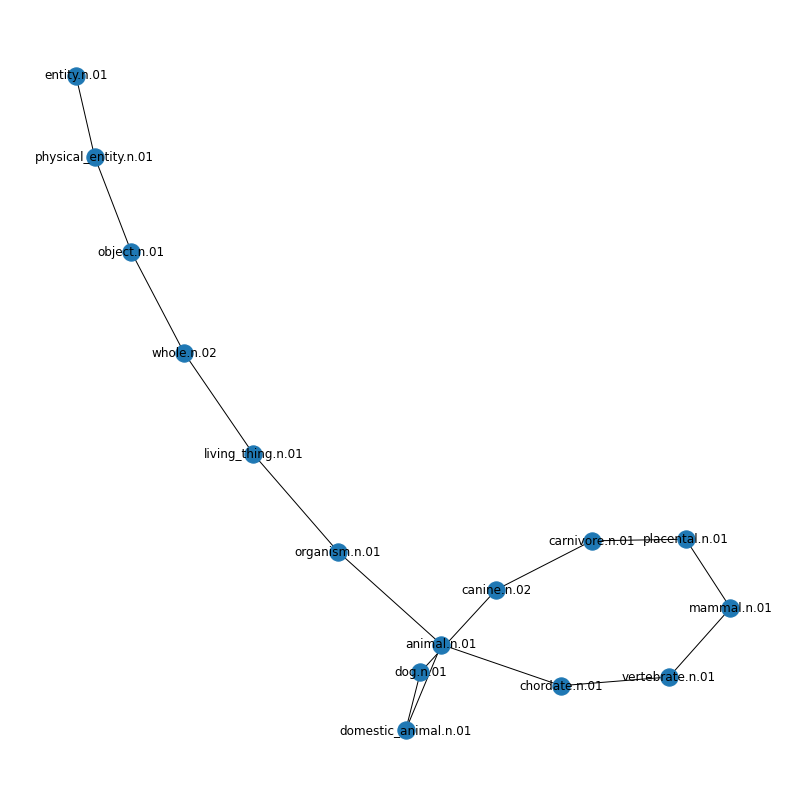

In [10]:
# Increasing figure size for better display of the graph.
from pylab import rcParams
rcParams['figure.figsize'] = 11, 11

# Draw the actual graph.
nx.draw_spring(G,with_labels=True)

What is interesting about this is that there is a *cycle* in the graph! This is because *dog* has two hypernyms, and those hypernyms are both superseded (directly or indirectly) by *animal.n.01*.

What is not so good is that the graph looks pretty ugly: there are several crossing edges, which is totally unnecessary. There are better layouts implemented in NetworkX, but they do require you to install `pygraphviz`. Once you've done that, you can execute the next cell. (And if not, then just assume it looks much prettier!)

In [16]:
# Install pygraphviz first: pip install pygraphviz
!sudo apt-get install -y graphviz-dev
!pip install pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
libgraphviz-dev is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


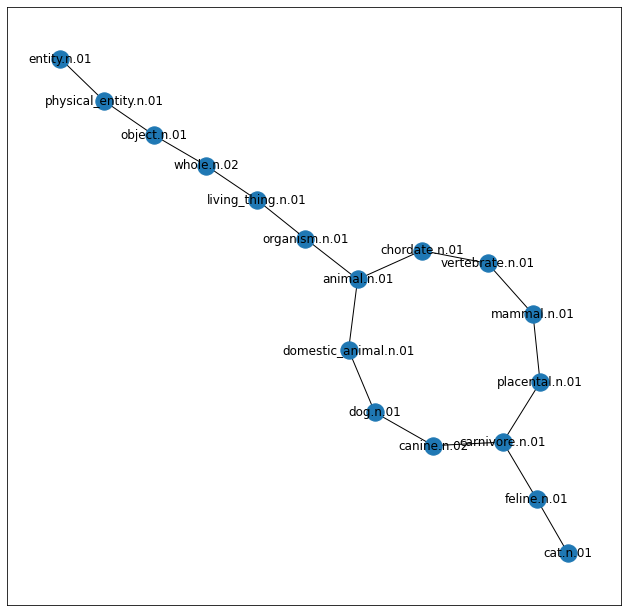

In [18]:
# Let's add 'cat' to the bunch as well.
cat = wn.synset('cat.n.01')
cat_edges = hypernym_edges(cat)
G.add_edges_from(cat_edges)

# Use the graphviz layout. First compute the node positions..
positioning = graphviz_layout(G)

# And then pass node positions to the drawing function.
nx.draw_networkx(G,pos=positioning)

**Question**

How do dogs differ from cats, according to WordNet?

Answer:

**Question**

Can you think of any data other than WordNet-synsets that could be visualized as a network?

Answer:

**More to explore**

* Python's network visualization tools are fairly limited (though we haven't really explored Pygraphviz (and Graphviz itself is able to create [examples like these](http://www.graphviz.org/Gallery.php))). It's usually easier to export the graph to GEXF and visualize it using [Gephi](https://gephi.org/) or [SigmaJS](http://sigmajs.org/). Gephi also features plugins, which enable you to create interactive visualizations. See [here](https://github.com/evanmiltenburg/dm-graphs/) for code and a link to a demo that Emiel made.

* For analyzing graphs, it is better to use either Gephi, or the [python-louvain](http://perso.crans.org/aynaud/communities/) library, which enables you to cluster nodes in a network.

* Some of the map-making libraries listed above also provide some cool functionality to create graphs on a map. This is nice to visualize e.g. relations between countries.

## 3. Maps

Maps are a *huge* subject that we won't cover in this course. If you are interested, you can take a look into the Basemap module.